<a href="https://colab.research.google.com/github/root-epifit/Graphs/blob/main/HW1/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 1

---
**Правила сдачи.** Домашнее задание состоит из двух задач. Каждая задача оценивается в 5 баллов.

Дедлайн первого домашнего задания — 15 февраля в 19:00. Решения нужно отправить по адресу pygraphs.sber@gmail.com. Решения будут проверены до 19:00 16 февраля.

Также можно отправить решения до 19:00 13 февраля. Тогда они будут проверены до 19:00 14 февраля и в случае наличия ошибок можно будет успеть их исправить до основного дедлайна.

---



#**Задача 1**

В этом задании мы рассмотрим граф товаров, часто покупаемых вместе, и попробуем выделить группы взаимосвязанных ключевых товаров, которые покупают со многими другими товарами той же группы. Для этого мы хотим последовательно удалять из графа вершины степени не больше 5 до тех пор, пока такие вершины остаются. После этого компоненты связности получившегося графа как раз и будем считать такими группами ключевых продуктов. 

В результате работы программа должна построить описанный выше граф и напечатать количество компонент связности в нем.

In [1]:
!pip install --upgrade scipy networkx
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/'Теория графов'/amazon0302.txt /content

In [4]:
# Задаем граф

import networkx as nx
import matplotlib.pyplot as plt

# Считываем данные из файла и заводим граф G_am
G_am = nx.read_edgelist("amazon0302.txt", create_using=nx.Graph(), nodetype=int, data=False)

# Перенумеровываем вершины
G_am = nx.convert_node_labels_to_integers(G_am, ordering='decreasing degree')

# Печатаем число вершин в G_am
nodes = G_am.number_of_nodes()
print("Число вершин: ", nodes)

# Печатаем число ребер в G_am
edges = G_am.number_of_edges()
print("Число ребер: ", edges)

# Печатаем число компонент связности в G_am
print("Число компонент связности: ", nx.number_connected_components(G_am))

Число вершин:  262111
Число ребер:  899792
Число компонент связности:  1


In [5]:
def cutoff_by_degree(G, degree_threshold = 5):
    # Добавьте сюда ваше решение. 
    # Результатом работы функции должен быть граф, получающийся из изначального графа последовательным удалением вершин степени не больше 5

    for (node, degree) in list(G.degree()):
        if degree < degree_threshold: 
            G.remove_node(node)
    
    return G

# Создаем копию графа, чтобы не портить основной
G = G_am.copy()
cutoff_by_degree(G)


# Печатаем число вершин в G
nodes = G.number_of_nodes()
print("Число вершин: ", nodes)

# Печатаем число ребер в G
edges = G.number_of_edges()
print("Число ребер: ", edges)

# Печатаем число компонент связности в G
print("Число компонент связности: ", nx.number_connected_components(G))

Число вершин:  235836
Число ребер:  837556
Число компонент связности:  30


In [ ]:
# В этом блоке можно посмотреть на результат

def draw_G(G):
    options = {
        "node_size": 2,
        "node_color": "black",
        "edgecolors": "black",
        "linewidths": 0.1,
        "width": 0.1,
    }

    nx.draw_networkx(G, with_labels=False, **options)
    plt.show()

draw_G(G)

#**Задача 2**

*Ветвью* в дереве называется простой путь, соединяющий две вершины степени отличной от двух (то есть, листья и вершины степени больше 2), в котором все промежуточные вершины имеют степень 2. Другими словами, ветвью называется связный фрагмент дерева, не содержащий ветвления. 
В этом задании мы хотим стянуть все ветви в данном дереве в ребра, то есть каждую ветвь заменить на ребро.

Например рассмотрим дерево на картинке ниже.

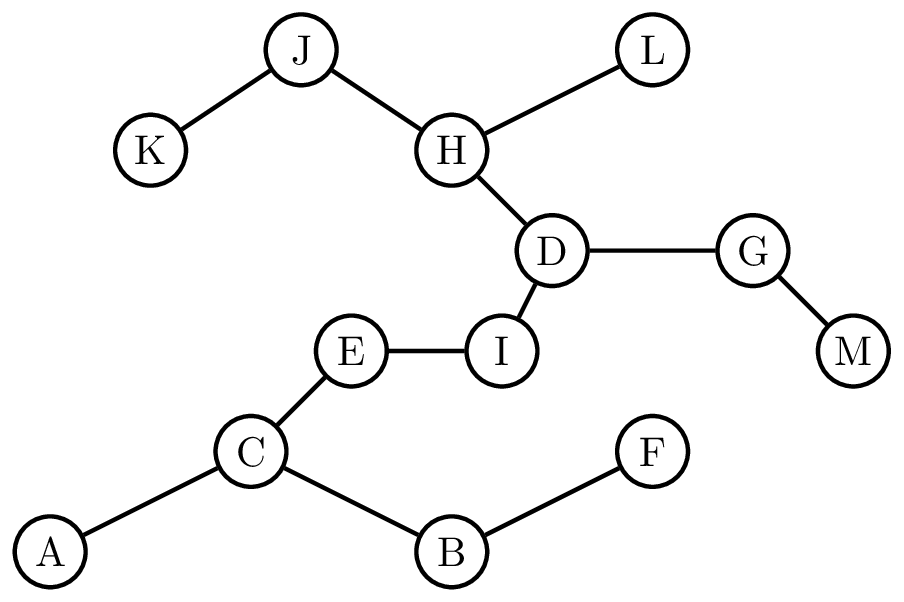

Выделим в ней вершины степени отличной от 2.

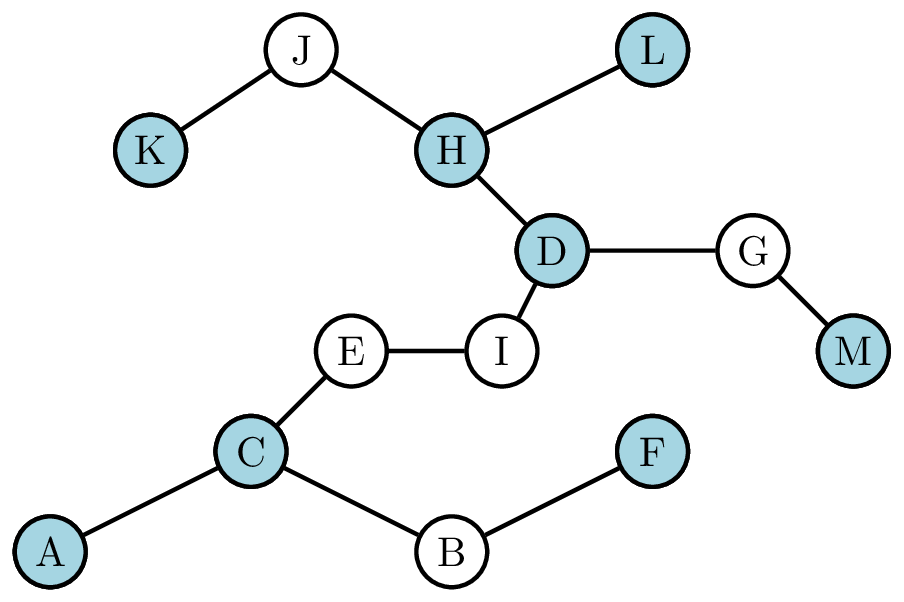

Ветвями являются части дерева между выделенными вершинами. Стянем каждую ветвь в ребро.

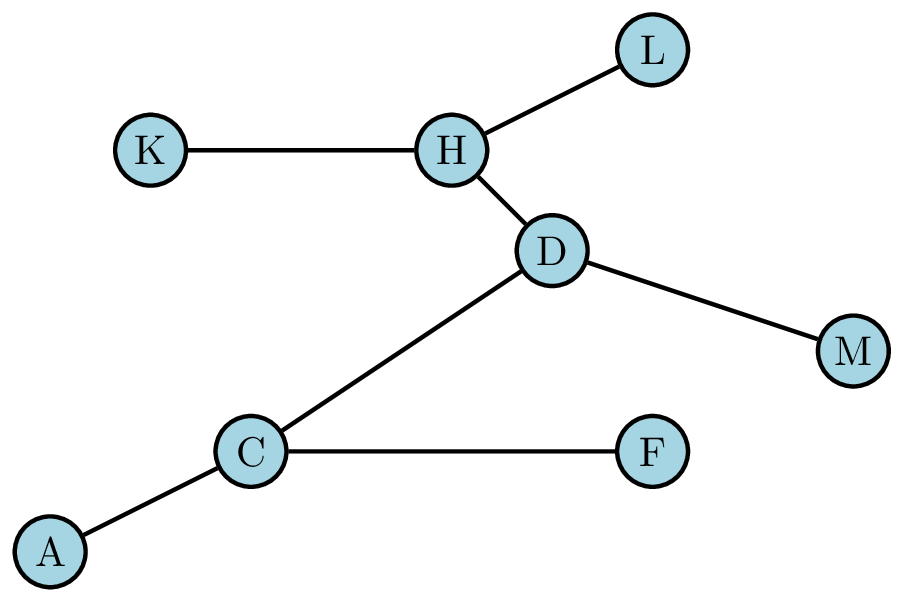


Ту же самую задачу можно сформулировать и по другому. Мы хотим избавиться от вершин степени 2 в дереве: каждую такую вершину мы удаляем, а ее соседей соединяем ребром напрямую. 

Для реализации алгоритма достаточно последовательно перебрать все вершины графа, и если это вершина степени 2, то можно ее удалить, а ее соседей в графе соединить ребром.

---
**Правила сдачи.** Это вторая из двух задач домашнего задания 1. Каждая задача оценивается в 5 баллов.

Дедлайн первого домашнего задания — **25 мая** в 19:00. Решения нужно отправить по адресу pygraphs.sber@gmail.com. Решения будут проверены до 19:00 26 мая. 

Также можно отправить решения до 19:00 **23 мая**. Тогда они будут проверены до 19:00 24 мая и в случае наличия ошибок можно будет успеть их исправить до основного дедлайна.

---



In [6]:
# Здесь мы загружаем библиотеку для работы с графами

import networkx as nx

In [8]:
# Эта функция по данному списку чисел строит дерево с соответствующими степенями вершин, мы обсуждали эту задачу на занятии
# Мы используем эту функцию здесь для генерации тестовых примеров
# Этот блок не нужно изменять

def create_tree(degrees):

    graph = nx.Graph()
    n = len(degrees)
    # Здесь мы проверяем условия, которым должен удовлетворять набор чисел
    if any([elem <= 0 for elem in degrees]) or sum(degrees) != 2 * n - 2:
        return None

    # Здесь мы заводим граф и заводим вершины в нем
    graph.add_nodes_from(range(n))
    for _ in range(n - 1):
        # Выбираем какую-нибудь вершину степени 1
        i = degrees.index(1)
        degrees[i] -= 1
        # Выбираем вершину максимальной степени 
        j = degrees.index(max(degrees))
        graph.add_edge(i, j)
        degrees[j] -= 1

    return graph

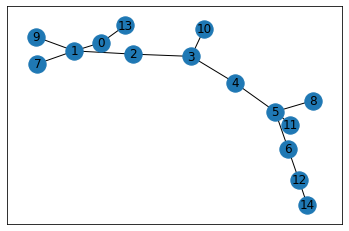

In [9]:
# Здесь мы задаем пример дерева, он может быть полезен для тестирования алгоритма. 

#G = create_tree([1, 3, 1, 2, 1, 3, 1])
G = create_tree([2, 4, 2, 3, 2, 4, 2, 1, 1, 1, 1, 1, 2, 1, 1])

nx.draw_networkx(G)

Степень вершины 2 равна 2, а ее соседи, это [3, 0]


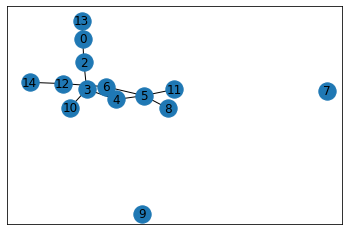

In [10]:
# Здесь собраны полезные команды, чтобы их не нужно было искать

# Создадим копию графа, чтобы не портить основной
H = G.copy()

# Этой командой можно удалить вершину
H.remove_node(1)
#nx.draw_networkx(H)

# Этой командой можно добавить ребро
H.add_edge(0,2)
nx.draw_networkx(H)

# Печатаем соседей вершины 2 и ее степень
print(f"Степень вершины 2 равна {H.degree(2)}, а ее соседи, это {list(H[2])}")


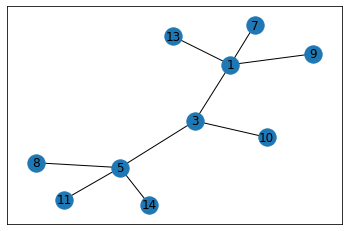

In [11]:
# В этом блоке нужно реализовать стягивание ветвей дерева

def construct_branch_tree(G):
    # Создаем копию списка вершин, она может пригодиться
    node_list = list(G.nodes()).copy()
    # Реализуйте здесь стягивание ветвей
    
    for (node, degree) in list(G.degree()):
        if degree == 2:
            neigbours = list(nx.neighbors(G, node))
            G.remove_node(node)
            G.add_edge(neigbours[0], neigbours[1])
            
    return G

H = construct_branch_tree(G.copy())

nx.draw_networkx(H)